# **How to start the lab:**

1.	Download the python code from Brightspace.
2.	Open the code in Google Colab.
3.	Download the dataset and review the dataset.
4.	Tasks are given with in the Python program.
5.	Complete each task.
6.	Finally, submit the file in Brightspace. (Please check Lab3 lab file to know how to submit)


<a id='intro'></a>
# **# Case Study: Income classification/Prediction Using Supervise Learning**

# **You will start from the basics.**

**The aim of the project** is to employ several supervised algorithms to accurately model individuals' income, whether he makes more than 50,000 or not, using data collected from the 1994 U.S. Census.

The dataset that will be used is the **Census income dataset**, which was extracted from the machine learning repository (UCI), which contains about 32561 rows and 15 features. This dataset is large enough to understand supervised learning methods.

You can download dataset using the UCI website as given below:

https://archive.ics.uci.edu/ml/datasets/Census+Income

# **The tasks are as follows:**

1. Open UCI website then open Data Folder.
2. Download "adult.data". This is the dataset we will process.This is raw data and we will not be able to process it in its current form. Therefore, we need to complete the next task.
3. Perform data cleaning.
4. Perform other tasks one by one.
5. Prepare a report for your own record (report can be utilised to assignment preparation.)
6. I highly recommend preparing report.

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# **Task**: Read the dataset. You can download dataset using the UCI website as given below:

https://archive.ics.uci.edu/ml/datasets/Census+Income

In [3]:
cens = pd.read_csv('https://raw.githubusercontent.com/samariwa/artificial-intelligence-projects/refs/heads/main/adult.data', names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', \
                                      'marital_status', 'occupation', 'relationship', 'race', 'sex', \
                                      'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])

The project poses some questions about this experiment:

**1. Does an individual make more than 50k income or not?**

**2. What are the most important features that help to define the income of an individual?**

<a id='overview'></a>
# Overview

In [4]:
# take an overview look at the data
cens.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Task: Display first 20 instances of the dataset.

In [6]:
cens.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
cens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Total number of records
n_records = cens.shape[0]

# Total number of features
n_features = cens.shape[1]

# Number of records where individual's income is more than $50,000
n_greater_50k = cens[cens['income'] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = cens[cens['income'] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32561
Total number of features: 15
Individuals making more than $50k: 24720
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


<a id='clean'></a>
# Data Cleaning

In [8]:
# drop uneeded columns
cens.drop('education', inplace=True, axis=1)
cens.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

- We have dropped the education feature. Which is a duplicate feature of education_num, but in a nonnumerical format.

The matching education level of the education number:

**1**: Preschool, **2**: 1st-4th, **3**: 5th-6th, **4**: 7th-8th, **5**: 9th, **6**: 10th, **7**: 11th, **8**: 12th, **9**: HS-grad,

**10**: Some-college, **11**: Assoc-voc, **12**: Assoc-acdm, **13**: Bachelors, **14**: Masters, **15**: Prof-school, **16**: Doctorate

In [9]:
# check for nulls
cens.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
capital_gain,0


- It appears that there are no null values occurred in the dataset.

In [10]:
# check duplicates and remove it
print("Before removing duplicates:", cens.duplicated().sum())

cens = cens[~cens.duplicated()]

print("After removing duplicates:", cens.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


- There are 24 duplicate rows in our dataset. So, we remove them to make the data more realistic and free-error.

In [12]:
# before discarding
cens.sex.value_counts()

,count
sex,
Male,21775
Female,10762


In [14]:
# discard spaces from entries
columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for column in columns:
    cens[column] = cens[column].str.strip()

In [15]:
# after discarding
cens.sex.value_counts()

,count
sex,
Male,21775
Female,10762


- Discarding the spaces from the entries of the dataset, for easier access.

In [16]:
# before changing "?"
cens.workclass.value_counts()

,count
workclass,
Private,22673
Self-emp-not-inc,2540
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [17]:
# changing "?" to Unknown
change_columns = ['workclass', 'occupation', 'native_country']
for column in change_columns:
        cens[column] = cens[column].replace({'?': 'Unknown'})

In [18]:
# after changing "?"
cens.workclass.value_counts()

,count
workclass,
Private,22673
Self-emp-not-inc,2540
Local-gov,2093
Unknown,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


- Changing "?" symbol to "Unknown", for better interpretation and cleaner representation.

<a id='explore'></a>
# Data Exploration

In [19]:
# a quick look on some statistics about the data
cens.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


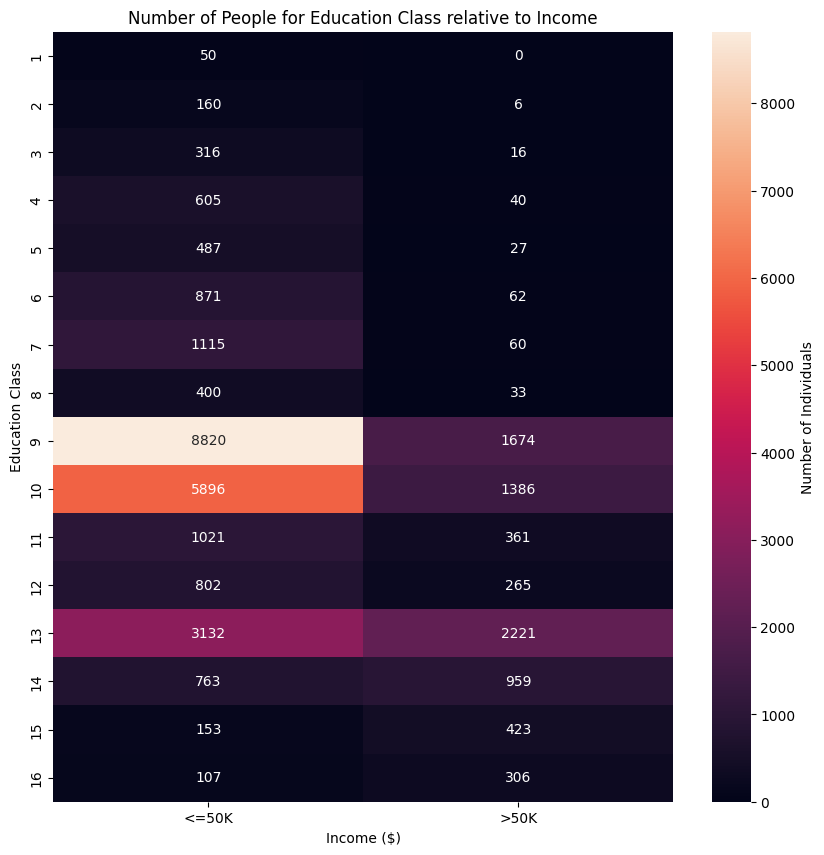

In [21]:
# Heat map
plt.figure(figsize=[10,10])

ct_counts = cens.groupby(['education_num', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education_num', columns = 'income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

- In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

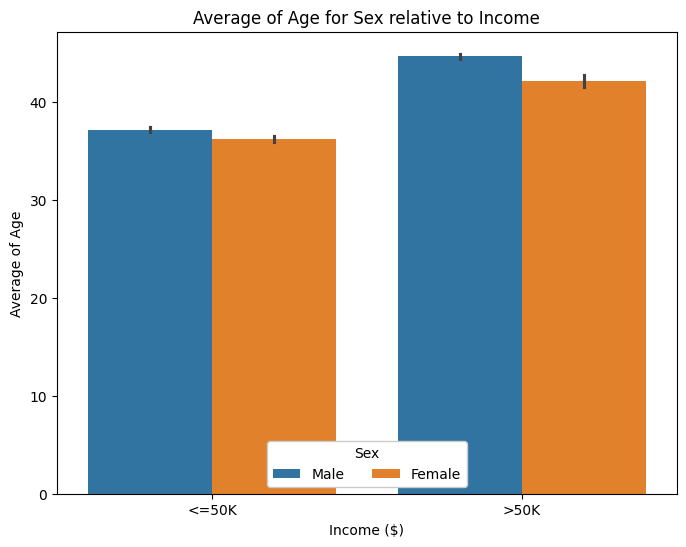

In [27]:
# Clustered Bar Chart
plt.figure(figsize=[8,6])
ax = sb.barplot(data = cens, x = 'income', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

- The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

<ipython-input-28-d994d5aa32f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=cens, x='income', y='hours_per_week', palette='YlGnBu')


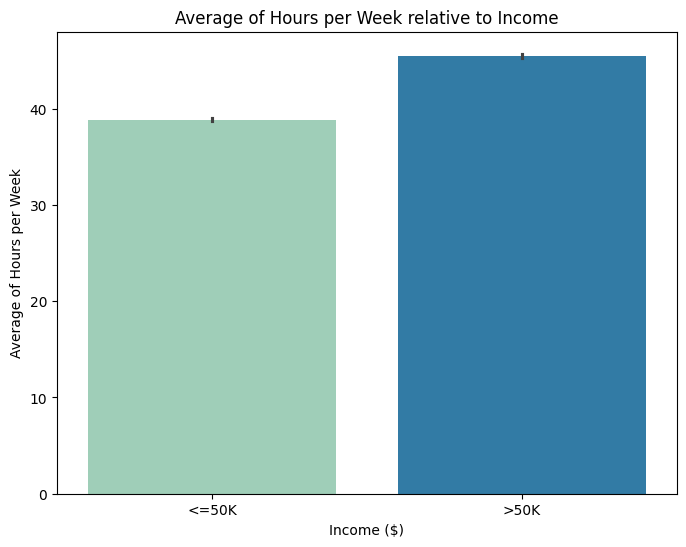

In [28]:
# Bar Chart
plt.figure(figsize=[8,6])
sb.barplot(data=cens, x='income', y='hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

- We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.

<a id='preprocess'></a>
# Data Preprocessing

In [29]:
cens_prep = cens.copy()

- We have taken a copy of the dataset to maintain the cleaned one for later uses, and to use the copied one for preparing the data for the model.

In [30]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital_gain', 'capital_loss', 'hours_per_week', 'fnlwgt']

scaler = MinMaxScaler()
cens_prep[numerical] = scaler.fit_transform(cens_prep[numerical])

In [31]:
cens_prep.sample(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
8863,0.178082,Private,0.156324,9,Separated,Craft-repair,Not-in-family,White,Male,0.0,0.0,0.500000,United-States,<=50K
28797,0.383562,Private,0.104434,9,Divorced,Other-service,Unmarried,White,Female,0.0,0.0,0.397959,United-States,<=50K
14274,0.068493,Private,0.163693,13,Never-married,Exec-managerial,Own-child,White,Female,0.0,0.0,0.061224,United-States,<=50K


- The data has been scaled to MinMaxScalling for numerical features, which converts the data to have a range between 0 and 1. That would help to make the data well-prepared for the model.

In [32]:
# Encoding
cens_prep['sex'] = cens_prep.sex.replace({"Female": 0, "Male": 1})
cens_prep['income'] = cens_prep.income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
cens_prep = pd.get_dummies(cens_prep)

<ipython-input-32-c46471c8add2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cens_prep['sex'] = cens_prep.sex.replace({"Female": 0, "Male": 1})
<ipython-input-32-c46471c8add2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cens_prep['income'] = cens_prep.income.replace({"<=50K": 0, ">50K": 1})


In [34]:
encoded = list(cens_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

92 total features after one-hot encoding.


- We have encoded and created dummy variables using the hot-encoding approach for the categorical features, to make it as numerical data. It helps for easier processing and more numerical representation.

<a id='exp'></a>
# Experimental Process

In the project, the **independent variables** have been chosen as follows:
1. **Age**
2. **Workclass**
3. **Fnlwgt**
4. **Education_num**
5. **Marital_status**
6. **Occupation**
7. **Relationship**
8. **Race**
9. **Sex**
10. **Capital_gain**
11. **Capital_loss**
12. **Hours_per_week**
13. **Native_country**

Also, the **Income** variable is considered to be the **dependent variable**, since it is our concern in this experiment.

# **Task: Analyse the code and import the libraries required to run this program**

In [35]:
# import some classification models
#Task 1: Import libraries for Random forset classifier, AdaBoost Classifier, Logistic Regression Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
#Task 2: Import libraries for cross validation, accuracy score, F1 score and splitting dataset.
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# **Task: Write code for splitting to training and testing. Training data = 80% and apply random split**

In [36]:
# Partioning the data
X = cens_prep.drop('income', axis=1)
y = cens_prep['income']

# Task-3: Write code for splitting to training and testing. Training data = 80% and apply random split


In [37]:
models = {}

# models with default parameter
models['LR'] = LogisticRegression() # LG: Logic Rrednwi
models['RandomForest'] = RandomForestClassifier() #modleik4gi34r
models['AdaBoost'] = AdaBoostClassifier() #ejfreuifhg


# Task: Write a short description on:
1. Cross validation
2. F1 Score


In [38]:
# Cross validation
for model_name in models:   # a loop to choose the model defined in the above code
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LR:
Accuracy: train:  0.8502320738119353 | test:  0.8491258196813056
F1-score: train:  0.6566540188560115 | test:  0.654726542880211
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999385312817921 | test:  0.8563790694320115
F1-score: train:  0.9998724108359383 | test:  0.6765109663362128
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8525678644406893 | test:  0.8519534256002872
F1-score: train:  0.6505737830390697 | test:  0.6488335343162018
---------------------------------------------------------


- As it appears from the exploration in our dataset that there is an imbalance between the classes of classifications. Since the individuals making more than 50k as income represent 75% of the data. So, we would try to make oversampling.

In [39]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [40]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999746944353063 | test:  0.936918136578101
F1-score: train:  0.999974694435287 | test:  0.9398370666203272


### Models Definitions:
**Logistic regression**, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

**A Random forest** is a meta estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**An AdaBoost classifier** is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

### Evaluation Methodology:
The data has been split into training and testing parts of the features and the label with a test size of 20% and with a random state to get the same randomness with the next runs. This happened by using the train_test_split function.

Cross-validation has been applied between the models to select the most suitable ones, We have done that using the cross_validate function with 5 folds splitting. And outputs the train and test score of the model.

All of This has been done that with a cleaned state of the data, also with the scaled and encoded version of it.

Due to the fact that there is an imbalance in the classes of classification. If this has been fixed, it would help the model to learn better from the various classes and to not be biassed towards one over another.

One way to fight this issue is to generate new samples in the classes which are under-represented (minority class). The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. This is called Oversampling, it is a technique used to modify unequal data classes to create balanced data sets.

And that has been applied using RandomOverSampler class from the imblearn library, to generate the new resampled data.

### Metrics used for Evaluation:

We have used the accuracy metric for the evaluation of the models. We can describe the accuracy metric as the ratio between the number of correct predictions and the total number of predictions:

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

Also, for binary classification, accuracy can also be calculated in terms of the confusion matrix terminology:

$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.


Also, F1-score has been used as one of the metrics in the experiment, it can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

The formula for the F1 score is:

$$\text{F1} = \frac{2 * (precision * recall)}{(precision + recall)}$$

<a id='conclude'></a>
# Conclusions

## Features Importance

In [41]:
from sklearn.preprocessing import LabelEncoder

In [47]:
cens_conc = cens.copy()

In [49]:
for col in cens_conc.columns:
    if cens_conc[col].dtypes == 'object':
        encoder = LabelEncoder()
        cens_conc[col] = encoder.fit_transform(cens_conc[col])

In [50]:
# Partioning the data
Xc = cens_conc.drop('income', axis=1)
yc = cens_conc['income']

# Splitting to training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [51]:
clf = RandomForestClassifier()
clf.fit(Xc_train, yc_train)


# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,age,14.799442
1,workclass,3.970784
2,fnlwgt,16.953096
3,education_num,11.893883
4,marital_status,6.552388
5,occupation,6.827737
6,relationship,10.848110
7,race,1.386558
8,sex,1.117570
9,capital_gain,11.582696


# Task: Why one should perform 'Feature Importance'?

Response:

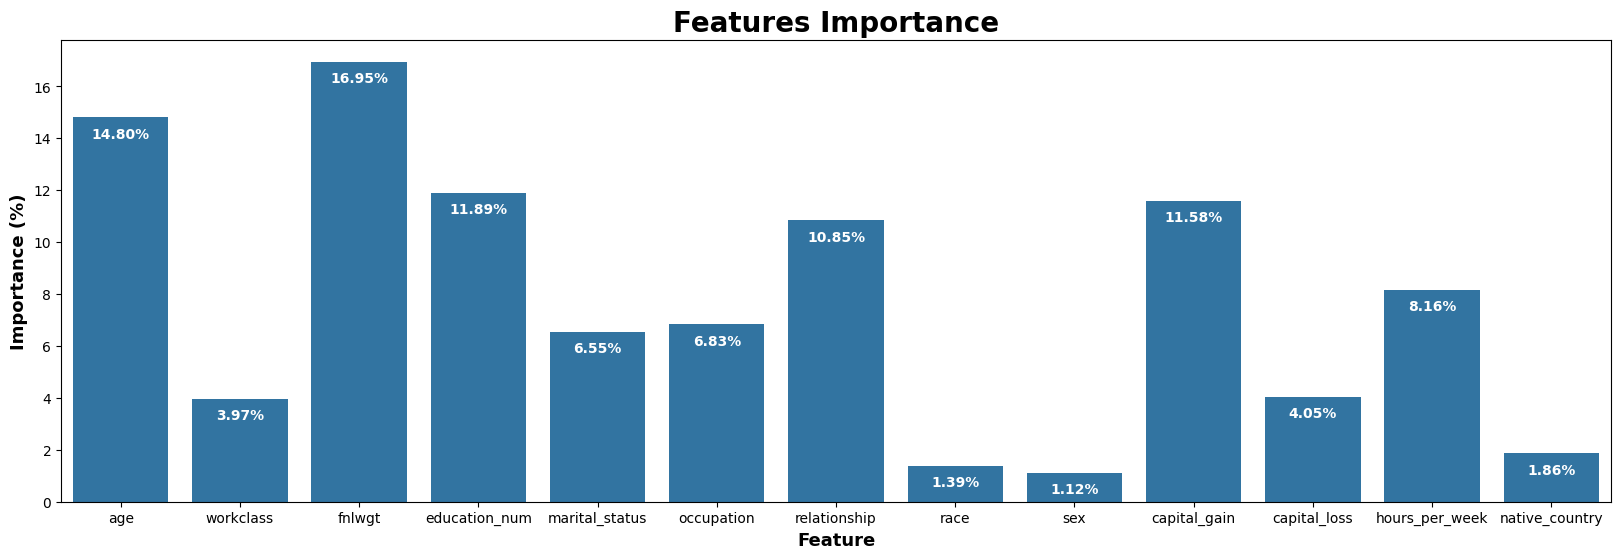

In [52]:
# Features importance plot
plt.figure(figsize=[20,6])
sb.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

- We plan to drop the features that have less than 4% impartance, to speed up the process of fitting the model. Since without them, it would provide the same results of the evaluation.

## Feature Selection

In [ ]:
cens_final = cens.copy()

In [ ]:
cens_final.head(2)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
cens_final.drop(['race', 'sex', 'capital_loss', 'native_country'], axis=1, inplace=True)

In [ ]:
# Scalling
numerical = ['age', 'capital_gain', 'hours_per_week', 'fnlwgt']
scaler = MinMaxScaler()
cens_final[numerical] = scaler.fit_transform(cens_final[numerical])

# Encoding
cens_final['income'] = cens_final.income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
cens_final = pd.get_dummies(cens_final)

# Partioning
Xf = cens_final.drop('income', axis=1)
yf = cens_final['income']

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Xf, yf)

In [ ]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.999979755548245 | test:  0.9317962221421713
F1-score: train:  0.9999797558043808 | test:  0.9352275929347027


# Task: Analyse the code of random forest classifier and write your code for other two classifiers that adaboost and logistic regression.



# Challenging Task: Try to implement to solve this problem using SVM and KNN.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

results = cross_validate(knn, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9823821800482962 | test:  0.8767515746197001
F1-score: train:  0.9820657397596186 | test:  0.8773248753569011


In [ ]:
from sklearn.svm import SVC
svc = SVC()

results = cross_validate(svc, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())